In [21]:
from astropy.io import fits,ascii
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from astropy.table import Table
from astropy.coordinates import SkyCoord

In [5]:
sys.path.append('/home/rfinn/github/APPSS/')

In [6]:
from a100sdss import ks, anderson

In [7]:
sys.path.append('/home/rfinn/github/LCS/python/Python3/')

In [8]:
from LCScommon import *

Running on coma


In [9]:
homedir = os.getenv("HOME")

In [10]:
def colormass(x1,y1,x2,y2,name1,name2, figname, hexbinflag=False,contourflag=False, \
             xmin=7.9, xmax=11.6, ymin=-1.2, ymax=1.2, contour_bins = 40, ncontour_levels=5,\
             xlabel='$\log_{10}(M_\star/M_\odot) $', ylabel='$(g-i)_{corrected} $', color2='c',\
             nhistbin=50, alphagray=.1):
    fig = plt.figure(figsize=(8,8))
    nrow = 4
    ncol = 4
    
    # for purposes of this plot, only keep data within the 
    # window specified by [xmin:xmax, ymin:ymax]
    
    keepflag1 = (x1 >= xmin) & (x1 <= xmax) & (y1 >= ymin) & (y1 <= ymax)
    keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
    
    x1 = x1[keepflag1]
    y1 = y1[keepflag1]
    
    x2 = x2[keepflag2]
    y2 = y2[keepflag2]
    
    ax1 = plt.subplot2grid((nrow,ncol),(1,0),rowspan=nrow-1,colspan=ncol-1, fig=fig)
    if hexbinflag:
        #t1 = plt.hist2d(x1,y1,bins=100,cmap='gray_r')
        #H, xbins,ybins = np.histogram2d(x1,y1,bins=20)
        #extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
        #plt.contour(np.log10(H.T+1),  10, extent = extent, zorder=1,colors='k')
        #plt.hexbin(xvar2,yvar2,bins='log',cmap='Blues', gridsize=100)

        plt.hexbin(x1,y1,bins='log',cmap='gray_r', gridsize=75,label=name1)
    else:
        plt.plot(x1,y1,'k.',alpha=alphagray,label=name1, zorder=2)
    if contourflag:
        H, xbins,ybins = np.histogram2d(x2,y2,bins=contour_bins)
        extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
        plt.contour((H.T), levels=ncontour_levels, extent = extent, zorder=1,colors=color2, label='__nolegend__')
        #plt.legend()
    else:
        plt.plot(x2,y2,'c.',color=color2,alpha=.3, label=name2)
        
        
        #plt.legend()
    #sns.kdeplot(agc['LogMstarTaylor'][keepagc],agc['gmi_corrected'][keepagc])#,bins='log',gridsize=200,cmap='blue_r')
    #plt.colorbar()
    
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22)
    #plt.axis([7.9,11.6,-.05,2])
    ax2 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=1,colspan=ncol-1, fig=fig, sharex = ax1, yticks=[])
    t = plt.hist(x1, normed=True, bins=nhistbin,color='k',histtype='step',lw=1.5, label=name1)
    t = plt.hist(x2, normed=True, bins=nhistbin,color=color2,histtype='step',lw=1.5, label=name2)
    #plt.legend()
    ax2.legend(fontsize=10,loc='upper left')
    ax2.xaxis.tick_top()
    ax3 = plt.subplot2grid((nrow,ncol),(1,ncol-1),rowspan=nrow-1,colspan=1, fig=fig, sharey = ax1, xticks=[])
    t=plt.hist(y1, normed=True, orientation='horizontal',bins=nhistbin,color='k',histtype='step',lw=1.5, label=name1)
    t=plt.hist(y2, normed=True, orientation='horizontal',bins=nhistbin,color=color2,histtype='step',lw=1.5, label=name2)
    
    plt.yticks(rotation='horizontal')
    ax3.yaxis.tick_right()
    plt.savefig(figname)

    print('############################################################# ')
    print('KS test comparising galaxies within range shown on the plot')
    print('')
    print('STELLAR MASS')
    t = ks(x1,x2,run_anderson=False)
    print('')
    print('COLOR')
    t = ks(y1,y2,run_anderson=False)



In [9]:
lcs = fits.getdata(homedir+'/github/LCS/tables/LCS_all_size.fits')

In [10]:
mstar = lcs['MSTAR_50']
sfr = np.log10(lcs['SFR_ZDIST'])
core = (lcs['DR_R200'] < 0.6) & (lcs['DELTA_V'] < 3.)
ssfr = sfr-mstar
sf_flag = ssfr > -11.2

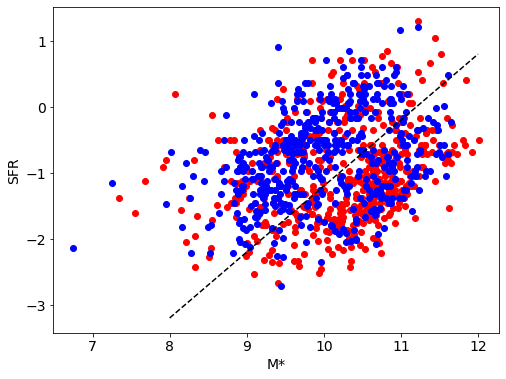

In [11]:
plt.figure(figsize=(8,6))
plt.plot(mstar[core],(sfr[core]),'ro',label='Core')
plt.plot(mstar[~core],(sfr[~core]),'bo',label='External')
plt.xlabel('M*')
plt.ylabel('SFR')
#plt.gca().set_yscale('log')
xl = np.linspace(8,12,100)
yl = -11.2 + xl
plt.plot(xl,yl,'k--')

(array([ 0.,  0.,  0.,  1.,  7., 37., 33., 39., 31., 44., 70., 85., 83.,
        36., 17.,  6.,  4.,  2.,  0.]),
 array([-14.        , -13.68421053, -13.36842105, -13.05263158,
        -12.73684211, -12.42105263, -12.10526316, -11.78947368,
        -11.47368421, -11.15789474, -10.84210526, -10.52631579,
        -10.21052632,  -9.89473684,  -9.57894737,  -9.26315789,
         -8.94736842,  -8.63157895,  -8.31578947,  -8.        ]),
 <a list of 1 Patch objects>)

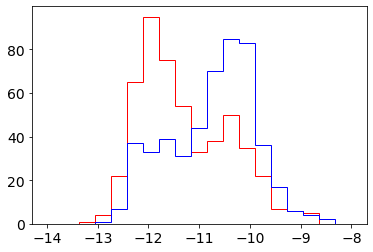

In [12]:
plt.figure()
mybins = np.linspace(-14,-8,20)
plt.hist(ssfr[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(ssfr[~core],bins=mybins,color='b',histtype='step',label='external')



############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 0.12955 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.09
p-vale = 0.29590 (prob that samples are from same distribution)


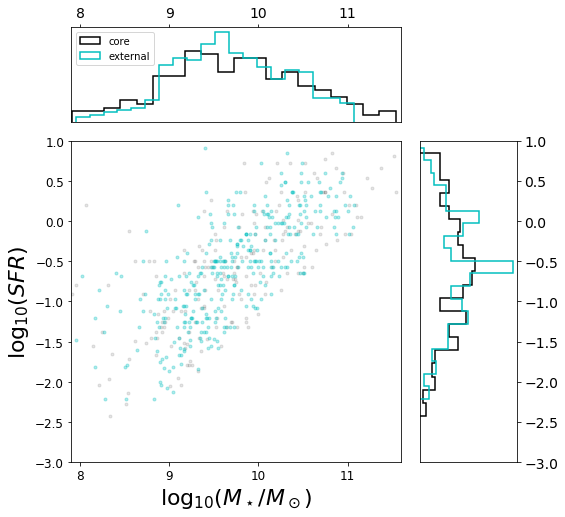

In [13]:
flag1 = core & sf_flag #& (mstar > 9.5)  & (mstar < 10.)
flag2 = ~core & sf_flag #& (mstar > 9.5) & (mstar < 10.)
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-3,ymax=1,nhistbin=20,ylabel='$\log_{10}(SFR)$')

So if we compare the core and external samples in the SFR-M* plane, we find no significant differences in either mass or SFR distribution.

# Reading in LCSbase instead #

In [11]:
%run ~/github/LCS/python/Python3/LCSbase.py

nothing happening here
(1800, 1800)
updating table


In [12]:
sfr = g.SFR_NUV_BEST
sfr = g.SFR_BEST
sfr = g.logSFR_NUV_BEST
#sfr = np.log10(g.s['SFR_ZDIST'])
mstar = g.logstellarmass
ssfr = sfr - mstar

sf_flag = ssfr > -11

In [13]:
core = g.membflag
core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)

### Comparing UV and IR SFRs ###

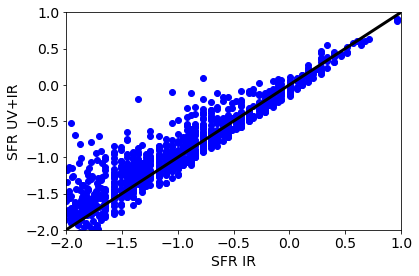

In [14]:
plt.figure()
sfr_uv = g.logSFR_NUV_BEST
sfr_ir = np.log10(g.SFR_BEST)
plt.plot(sfr_ir,sfr_uv,'bo')
plt.xlabel('SFR IR')
plt.ylabel('SFR UV+IR')
xmin=-2
xmax=1
plt.axis([xmin,xmax,xmin,xmax])
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'k-',lw=3)

# Using Kennicutt & Evans SFR Conversions #

Switched from chary & elbaz to kennicutt and Evans SFRs.  The plot below shows UV, IR, and UV+IR SFRs.  The IR is sensitive to highests SFRs, and UV misses or underestimates these.  However, the UV detects lower SFRs that IR tracers miss.  Thus, the optimum tracer of SF is UV+IR.

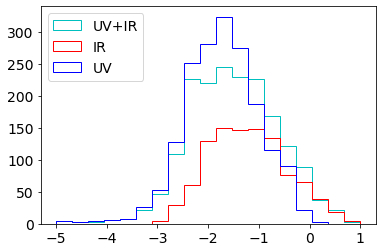

In [15]:
# compare distribution of SFRs
plt.figure()
mybins = np.linspace(-5,1,20)
plt.hist(g.logSFR_NUVIR_KE,histtype='step',color='c',bins=mybins,label='UV+IR')
plt.hist(g.logSFR_IR_KE,histtype='step',color='r',bins=mybins,label='IR')
plt.hist(g.logSFR_NUV_KE,histtype='step',color='b',bins=mybins,label='UV')
plt.legend(loc='upper left')

UV+IR probes to lower SFRs than IR alone.  

## SFR- Mstar with Kennicutt & Evans SFRs ##

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.12
p-vale = 0.00002 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 0.00000 (prob that samples are from same distribution)


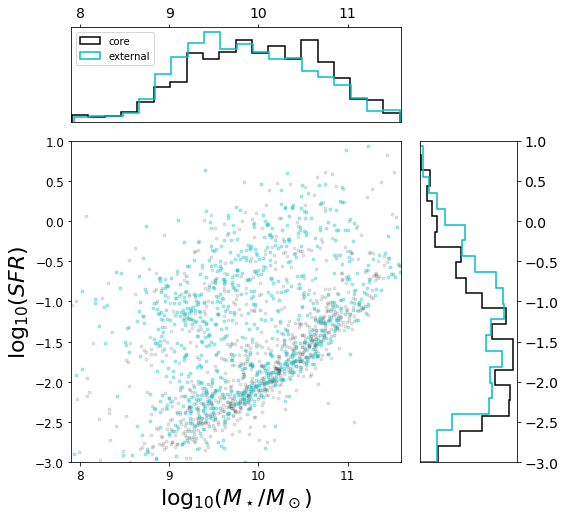

In [16]:
sfr = g.logSFR_NUVIR_KE
mstar = g.logstellarmass
ssfr = sfr - mstar
flag1 = core #& sf_flag #& (mstar > 9.5)  & (mstar < 10.)
flag2 = ~core #& sf_flag #& (mstar > 9.5) & (mstar < 10.)
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-3,ymax=1,nhistbin=20,ylabel='$\log_{10}(SFR)$')

This difference we see between the core and external sample is do to the higher fraction of galaxies on the passive sequence.  The SFRs on the passive sequence are not reliable and should be thought of as upper limits (according to Leroy+2019).  

We also need to apply mass cuts.

## plot distribution of sSFR to see where to cut the passive galaxies##

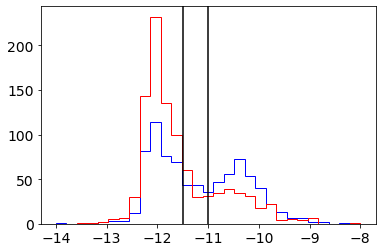

In [17]:
plt.figure()
sfr = g.logSFR_NUVIR_KE
mstar = g.logstellarmass
ssfr = sfr - mstar
flag1 = core & (mstar > 9.5)  #& (mstar < 10.)
flag2 = ~core &  (mstar > 9.5) #& (mstar < 10.)
plt.hist(ssfr[~core],bins=np.linspace(-14,-8,30),color='b',histtype='step')
plt.hist(ssfr[core],bins=np.linspace(-14,-8,30),color='r',histtype='step')
plt.axvline(x=-11.5,color='k')
plt.axvline(x=-11.,color='k')


# Checking Redshift distribution to see if sample is in Leroy #

Our internal analysis for LCS is limited by :
* the size of the external comparison sample
* the fact that the external sample is not a true field sample.

We are looking for other field samples to compare with.

### Leroy+2019 ###

This is a reprocessing of galaxies with $z < 3500$~km/s.  There are only 18 galaxies in common with LCS.   However, we can use this as a field comparison.

### Salim+2017 ###

The GALEX-SDSS-WISE Legacy survey has SFR and Mstar for SDSS galaxies out to $z < ??$

We have $\sim$1500 galaxies in common b/w LCS and GSWLC.  This is definitely a better field sample.  And we can use the SFRs and Mstar values from GSW for all comparisons (including LCS galaxies) so that there is in no potential systematics related to how these quantities are calculated.

In [18]:
g.s.columns

ColDefs(
    name = 'NSAID'; format = 'J'
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'ZDIST'; format = 'E'
    name = 'SERSIC_TH50'; format = 'E'
    name = 'SERSIC_N'; format = 'E'
    name = 'SERSIC_BA'; format = 'E'
    name = 'SERSIC_PHI'; format = 'E'
    name = 'PETROTH50'; format = 'E'
    name = 'PETROTH90'; format = 'E'
    name = 'D4000'; format = 'E'
    name = 'HAEW'; format = 'E'
    name = 'VDISP'; format = 'E'
    name = 'FA'; format = 'E'
    name = 'HAFLUX'; format = 'E'
    name = 'N2FLUX'; format = 'E'
    name = 'HBFLUX'; format = 'E'
    name = 'O3FLUX'; format = 'E'
    name = 'AHDEW'; format = 'E'
    name = 'AV'; format = 'E'
    name = 'ISDSS'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'NMGY'; format = '7D'
    name = 'NMGY_IVAR'; format = '7D'
    name = 'ABSMAG'; format = '7D'
    name = 'SERSICFLUX'; format = '7D'
    name = 'CLUMPY'; forma

Text(0, 0.5, 'number')

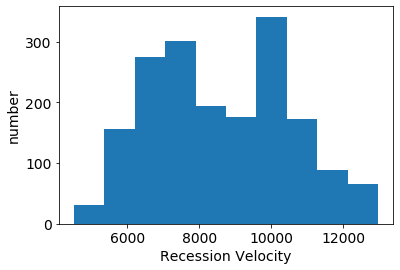

In [19]:
plt.figure()
plt.hist(g.s['ZDIST']*3.e5)
plt.xlabel('Recession Velocity')
plt.ylabel('number')

# Make LCS catalog to upload  to IRSA#

- need NSAID, RA, DEC, radius (10") 

In [74]:
search_radius = 30.*np.ones(len(g.s)) # units are arcsec
newtable = Table([g.s['NSAID'],g.s['RA'],g.s['DEC'],search_radius],names=['galid','ra','dec','major'])
newtable.write('/home/rfinn/research/lcs_sample.txt',format='ipac',overwrite=True)


In [108]:
lcsmgs = ascii.read('/home/rfinn/research/LCS/lcs_z0mgs_match.tbl',format='ipac')

In [109]:
# number of matches
print(sum(lcsmgs['ra'] > 0))

18


We have 18 galaxies that overlap between the Local Cluster Survey and the z0MGS.  We compare the stellar mass and SFR estimates from LCS and z0MGS for these galaxies.  Both the stellar mass and SFRs are consistent.

Text(0, 0.5, '$ \\log_{10}(SFR \\ z0MGS)$')

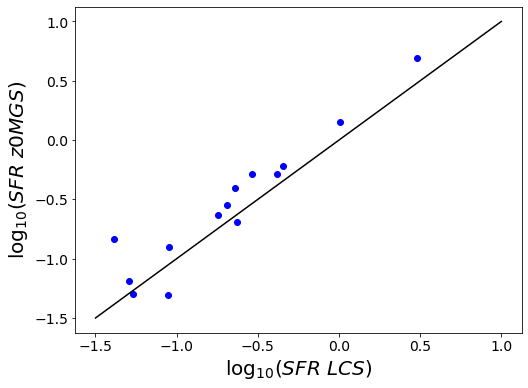

In [121]:
# compare SFRs
plt.figure(figsize=(8,6))
sfr1 = g.logSFR_NUVIR_KE
sfr2 = lcsmgs['logsfr']
plt.plot(sfr1,sfr2,'bo')
xl = np.linspace(-1.5,1,10)
plt.plot(xl,xl,'k-')
plt.xlabel('$\log_{10}(SFR \ LCS)$',fontsize=20)
plt.ylabel('$ \log_{10}(SFR \ z0MGS)$',fontsize=20)

Text(0, 0.5, '$\\log_{10}(M_\\star \\ z0MGS/M_\\odot)$')

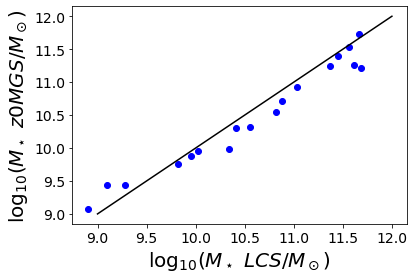

In [119]:
# compare SFRs
plt.figure()
sfr1 = g.logstellarmass
sfr2 = lcsmgs['logmass']
plt.plot(sfr1,sfr2,'bo')
xl = np.linspace(9,12,10)
plt.plot(xl,xl,'k-')
plt.xlabel('$\log_{10}(M_\star \ LCS/M_\odot)$',fontsize=20)
plt.ylabel('$\log_{10}(M_\star \ z0MGS/M_\odot)$',fontsize=20)

The z0MGS SFRs are systematically higher than the K&E SFRs I have calculated for the LCS galaxies.

The slope of the z0MGS vs Moustakas stellar masses is less than 1, meaning that z0MGS has lower masses for high mass galaxies and higher masses for low-mass galaxies.  Not sure what to make of this...

# downloaded full z0MGS catalog from irsa#

In [23]:
mgs = ascii.read('/home/rfinn/research/z0mgs/z0mgs_full_catalog.tbl',format='ipac')

In [24]:
mgs.columns

<TableColumns names=('pgc_name','pgc','ra','dec','gl_deg','gb_deg','resolution','has_fuv','has_nuv','has_wise1','has_wise2','has_wise3','has_wise4','time_fuv','time_nuv','afuv','anuv','rms_fuv','std_fuv','rms_nuv','std_nuv','rms_wise1','std_wise1','rms_wise2','std_wise2','rms_wise3','std_wise3','rms_wise4','std_wise4','sat_effects_fuv','star_area_fuv','star_flux_fuv','star_flag_fuv','sat_effects_nuv','star_area_nuv','star_flux_nuv','star_flag_nuv','sat_effects_wise1','star_area_wise1','star_flux_wise1','star_flag_wise1','sat_effects_wise2','star_area_wise2','star_flux_wise2','star_flag_wise2','sat_effects_wise3','star_area_wise3','star_flux_wise3','star_flag_wise3','sat_effects_wise4','star_area_wise4','star_flux_wise4','star_flag_wise4','galaxy_mask_overlap','galaxy_overlap_flag','flux_fuv','rms_flux_fuv','std_flux_fuv','flux_nuv','rms_flux_nuv','std_flux_nuv','flux_wise1','rms_flux_wise1','std_flux_wise1','flux_wise2','rms_flux_wise2','std_flux_wise2','flux_wise3','rms_flux_wise3','s

1081


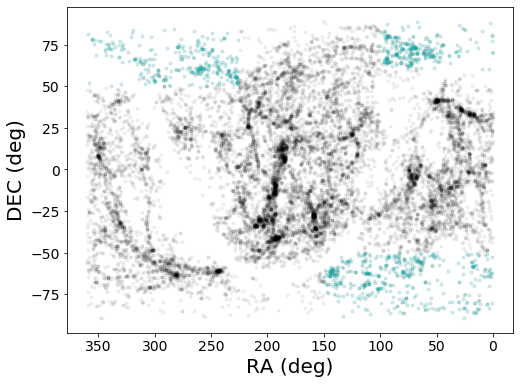

In [140]:
plt.figure(figsize=(8,6))
plt.plot(mgs['ra'],mgs['dec'],'k.',alpha=.05)
plt.gca().invert_xaxis()
ra = mgs['ra']
dec = mgs['dec']
region1 = (ra > 225) & (dec > 50)
region2 = (ra < 150) & (dec < -50)
region3 = (ra < 100) & (dec > 60)
plt.plot(ra[region1],dec[region1],'c.',alpha=.1)
plt.plot(ra[region2],dec[region2],'c.',alpha=.1)
plt.plot(ra[region3],dec[region3],'c.',alpha=.1)
print(sum(region1)+sum(region2) + sum(region3))
fieldsample = region1 | region2 | region3
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig('z0mgs-positions.pdf')

The cyan regions are areas that we selected "by eye" to be relatively low density regions.  This is a first attempt at creating a field sample.  

A more quantitative comparison is to calculate local density, and then select a "field" sample according to local density.

In [36]:
pos = SkyCoord(ra=mgs['ra'],dec=mgs['dec'], distance=mgs['dist_mpc'],frame='icrs')

In [66]:
NN = 10
idx, d2d, d3d = pos.match_to_catalog_3d(pos,nthneighbor=NN)

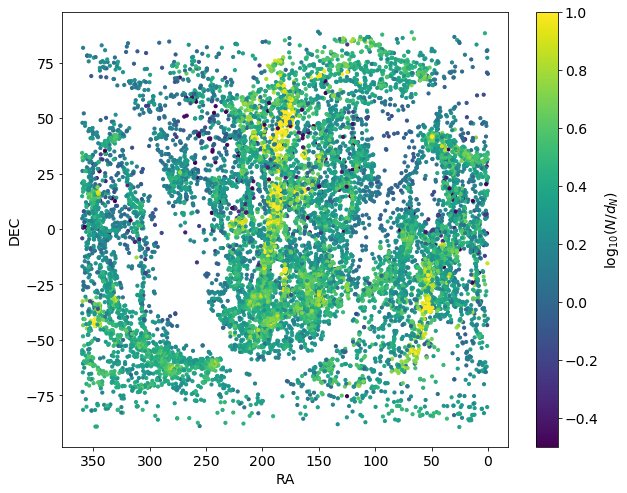

In [75]:
plt.figure(figsize=(10,8))
densN = NN/d3d
plt.scatter(mgs['ra'],mgs['dec'],c=np.log10(densN*u.Mpc),vmin=-.5,vmax=1.,s=10)
plt.colorbar(label='$\log_{10}(N/d_N)$')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()

Text(0.5, 0, '$ \\log_{10} (N/d_N)$')

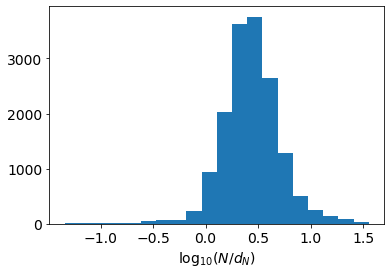

In [79]:
plt.figure()
t = plt.hist(np.log10(densN*u.Mpc), bins=20)
plt.xlabel('$ \log_{10} (N/d_N)$')

Seems reasonable to select "field" as galaxies with $\log_{10}(N/d_N) < 0.5$

# Comparison of LCS with GSWLC #

I matched to GSWLC-X2 - used 5 arcsecond radius.  found 1496 matches.

In [89]:
lcsgsw = fits.getdata('/home/rfinn/research/LCS/tables/lcs-gswlc-x2-match.fits')
#lcsgsw['sampleflag'] = lcsgsw['sampleflag'] == 84

In [265]:
lcsgsw['flag_uv']

array([3, 3, 2, ..., 3, 0, 3], dtype=int16)

In [267]:
print('number of matches between LCS and GSWLC = ',len(lcsgsw))
print('number with UV = ',sum(lcsgsw['flag_uv'] == 2))
print('number with mid IR = ',sum(lcsgsw['flag_midir'] == 1))
print('number with multiwave data = ',sum(lcsgsw['flag_mgs'] == 1))

number of matches between LCS and GSWLC =  1505
number with UV =  546
number with mid IR =  437
number with multiwave data =  1477


## Compare SFRs and Stellar Masses ##

Text(0, 0.5, 'GSWLC Mstar')

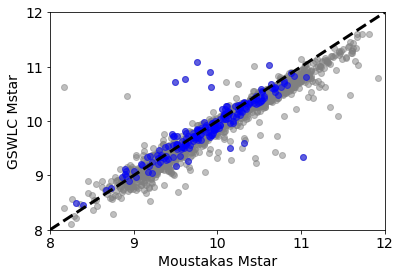

In [219]:
plt.figure()
plt.plot((lcsgsw['MSTAR_50']),lcsgsw['logMstar'],'ko',color='0.5',alpha=.5)
flag = lcsgsw['sampleflag']
plt.plot(lcsgsw['MSTAR_50'][flag],lcsgsw['logMstar'][flag],'bo',alpha=.5)
axis([8,12,8,12])
xl = np.linspace(8,12,100)
plt.plot(xl,xl,'k--',lw=3)
plt.xlabel('Moustakas Mstar')
plt.ylabel('GSWLC Mstar')

Text(0.5, 1.0, 'Distribution of GSWLC Mstar for LCS Galaxies')

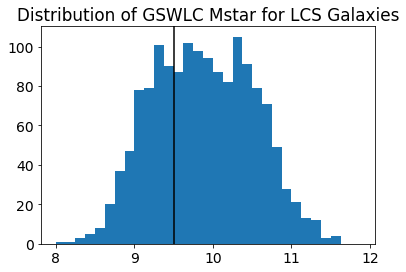

In [274]:
plt.figure()
mybins=np.arange(8,12,.125)
plt.hist(lcsgsw['logMstar'],bins=mybins)
plt.axvline(x=9.5,c='k')
plt.title('Distribution of GSWLC Mstar for LCS Galaxies')
#print(sum(lcsgsw.sampleflag))

number of galaxies with logMstar > 9.5 =  1025


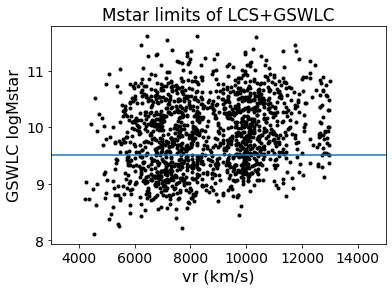

In [287]:
plt.figure()
flag = lcsgsw['logMstar']> 0
x = lcsgsw['Z']*3.e5
y = lcsgsw['logMstar']
plt.plot(x[flag],y[flag],'k.')
plt.xlim([3000,15000])
plt.axhline(y=9.5)
plt.title('Mstar limits of LCS+GSWLC')
plt.xlabel('vr (km/s)',fontsize=16)
plt.ylabel('GSWLC logMstar',fontsize=16)
print('number of galaxies with logMstar > 9.5 = ',sum(y > 9.5))

Text(0, 0.5, 'GSWLC logMstar')

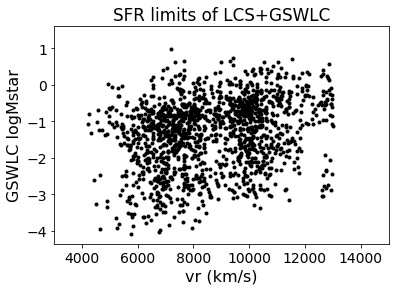

In [286]:
plt.figure()
flag = lcsgsw['logMstar']> 0
x = lcsgsw['Z']*3.e5
y = lcsgsw['logSFR']
plt.plot(x[flag],y[flag],'k.')
plt.xlim([3000,15000])
#plt.axhline(y=9.5)
plt.title('SFR limits of LCS+GSWLC')
plt.xlabel('vr (km/s)',fontsize=16)
plt.ylabel('GSWLC logMstar',fontsize=16)

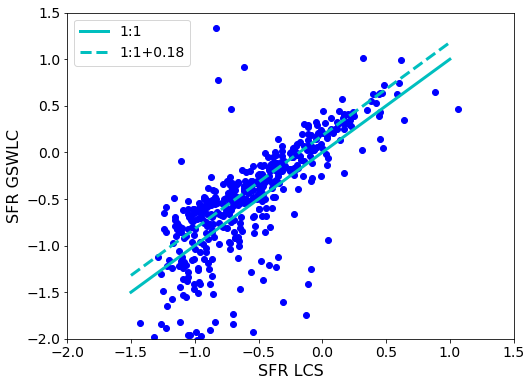

In [207]:
plt.figure(figsize=(8,6))
flag = lcsgsw['sampleflag'] & ~lcsgsw['membflag']
flag = lcsgsw['lirflag']
plt.plot(lcsgsw['logSFR_NUVIR_KE'][flag],lcsgsw['logSFR'][flag],'bo')
axis([-2,1.5,-2,1.5])
xl = np.linspace(-1.5,1,20)
plt.plot(xl,xl,'c-',lw=3,label='1:1')
offset=.18
plt.plot(xl,xl+offset,'c--',lw=3,label='1:1+'+str(offset))
plt.xlabel('SFR LCS',fontsize=16)
plt.ylabel('SFR GSWLC',fontsize=16)
plt.legend()

# SFR - Mstar with GSWLC Values for SFR and Mstar#

* Comparing core and external samples using GSWLC measures of SFR and stellar mass.

* results are sensitive to mass and ssfr cuts.

* if we use log(Mstar) > 9.5 and log(sSFR)> -1.5, then we detect an offset in SFR between cluster and field




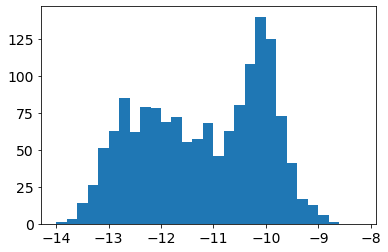

In [236]:
masscut = 9.25
#core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)

mstar = lcsgsw['logMstar']
sfr = lcsgsw['logSFR']
ssfr = sfr - mstar
mybins = np.arange(-14,-8,.2)
t=plt.hist(ssfr,bins=mybins)

1496
1025


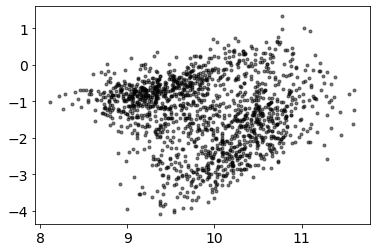

In [244]:
plt.figure()
flag = mstar > -20
print(sum(flag))
print(sum(flag & (mstar > 9.5)))
plt.plot(mstar[flag],sfr[flag],'k.',alpha=.5)

8
number in field =  None
number in core sample =  220
number in external sample =  222
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 0.13052 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 0.00030 (prob that samples are from same distribution)


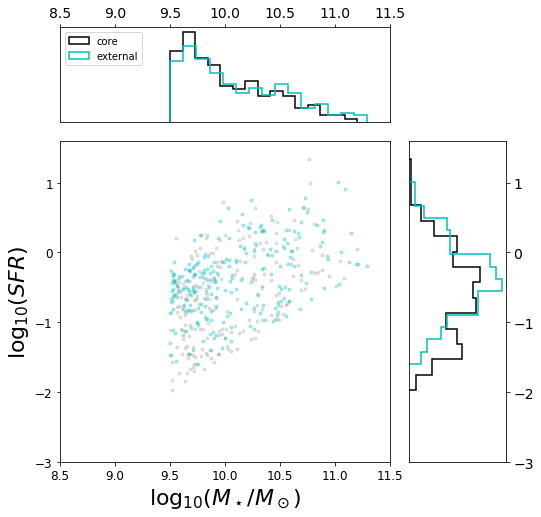

In [295]:
masscut = 9.5
ssfrcut = -11.5
#core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
mstar = lcsgsw['logMstar']
sfr = lcsgsw['logSFR']
ssfr = sfr - mstar
ssfr_flag = (ssfr < -7) & (ssfr > ssfrcut)
#core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
flag1 = lcsgsw['membflag'] &  (lcsgsw['logMstar']> masscut)  & ssfr_flag
#fieldflag = (lcsgsw['DR_R200'] > 3) & (lcsgsw['DELTA_V'] > 3)
#print('number in field = ',print(sum(fieldflag)))
flag2 = ~lcsgsw['membflag'] &  (lcsgsw['logMstar']> masscut)  & ssfr_flag
#flag2 = fieldflag &  (lcsgsw['logMstar']> masscut)  & ssfr_flag
print('number in core sample = ',sum(flag1))
print('number in external sample = ',sum(flag2))
colormass(mstar[flag1],sfr[flag1],mstar[flag2],sfr[flag2],'core','external','sfr-mstar-gswlc.pdf',ymin=-3,ymax=1.6,xmin=8.5,xmax=11.5,nhistbin=15,ylabel='$\log_{10}(SFR)$')
#plt.plot(xl,xl+ssfr_lower_limit,'k--',c='0.5'6
#plt.axis([9,12,-2,1.5]),

# Creating Field Sample from Full GSWLC #

* for a quick test, use entire GSWLC catalog

In [81]:
gsw = ascii.read('/home/rfinn/research/GSWLC/GSWLC-X2.dat')
gsw = gsw[((gsw['Z']*3.e5 < 13000.) & (gsw['logMstar']> 0))] 
print('number is GSWLC = ',len(gsw))

number is GSWLC =  65611


In [87]:
print(sum(gsw['flag_mgs']))

63521


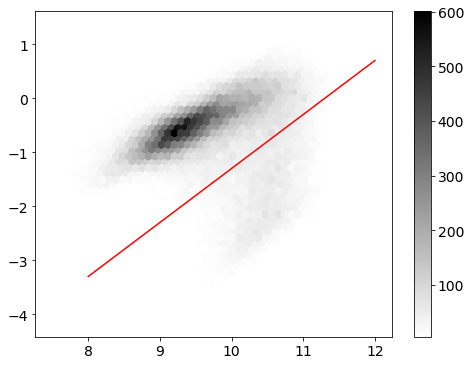

In [90]:
plt.figure(figsize=(8,6))
#plt.plot(gsw['logMstar'],gsw['logSFR'],'k.',alpha=.5)
plt.hexbin(gsw['logMstar'],gsw['logSFR'],gridsize=50,vmin=5,cmap='gray_r')
plt.colorbar()
xl=np.linspace(8,12,50)
ssfr_limit = -11.3
plt.plot(xl,xl+ssfr_limit,'r-')

8
number in field =  None
number in core sample =  124
number in external sample =  20571
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 0.14319 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 0.00007 (prob that samples are from same distribution)


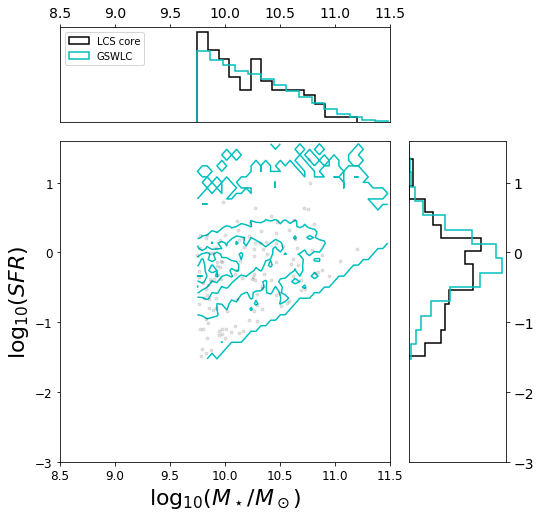

In [91]:
masscut = 9.75
ssfrcut = -11.3
#core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
mstar = lcsgsw['logMstar']
sfr = lcsgsw['logSFR']
ssfr = sfr - mstar
ssfr_flag = (ssfr < -7) & (ssfr > ssfrcut)
#core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
flag1 = lcsgsw['membflag'] &  (lcsgsw['logMstar']> masscut)  & ssfr_flag
fieldflag = (lcsgsw['DR_R200'] > 3) & (lcsgsw['DELTA_V'] > 3)
print('number in field = ',print(sum(fieldflag)))
#flag2 = ~lcsgsw['membflag'] &  (lcsgsw['logMstar']> masscut)  & ssfr_flag
flag2 = (gsw['logMstar'] > masscut) & (gsw['logSFR']-gsw['logMstar'] > ssfrcut) 
#flag2 = fieldflag &  (lcsgsw['logMstar']> masscut)  & ssfr_flag
print('number in core sample = ',sum(flag1))
print('number in external sample = ',sum(flag2))
colormass(mstar[flag1],sfr[flag1],gsw['logMstar'][flag2],gsw['logSFR'][flag2],'LCS core','GSWLC','sfr-mstar-gswlc-field.pdf',ymin=-3,ymax=1.6,xmin=8.5,xmax=11.5,nhistbin=15,ylabel='$\log_{10}(SFR)$',contourflag=True)
#plt.plot(xl,xl+ssfr_lower_limit,'k--',c='0.5'6
#plt.axis([9,12,-2,1.

# Creating Field Sample from LCS local densities #

1505


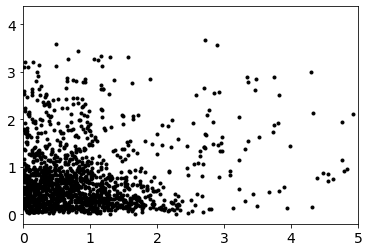

In [256]:
plt.figure()
x = lcsgsw['DELTA_V']
y = lcsgsw['DR_R200']
plt.plot(x,y,'k.')
#plt.gca().set_xscale('log')
plt.xlim(0,5)
print(len(x))

# SFR - Mstar using GSWLC values for LCS and z0MGS field sample #

# SFR - Mstar for Most Massive Clusters vs Field #

- selecting Coma and A2063 - most massive clusters


In [34]:
sfr = g.logSFR_NUVIR_KE
mstar = g.logstellarmass
ssfr = sfr - mstar
sf_flag = ssfr > -99
ssfr_lower_limit = -11.5
xl = np.linspace(8.5,11.5)

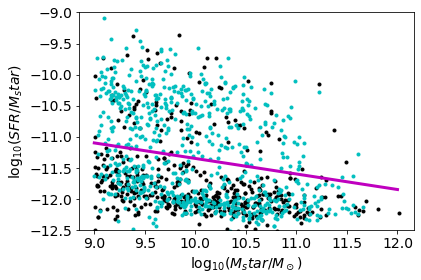

In [51]:
flag1 = core & g.clusterflag & sf_flag & (mstar > masscut)  #& (mstar < 10.)
flag2 = ~core & sf_flag & (mstar > masscut) #& (mstar < 10.)
plt.figure()
plt.plot(mstar[flag1],ssfr[flag1],'k.')
plt.plot(mstar[flag2],ssfr[flag2],'c.')
plt.ylim(-12.5,-9)
xl = np.linspace(9,12,20)
plt.plot(xl,-.25*(xl-9)-11.1,'m-',lw=3)
plt.xlabel('$\log_{10}(M_star/M_\odot) $')
plt.ylabel('$\log_{10}(SFR/M_star) $')
plt.savefig('ssfr_cut.pdf')
ssfr_flag = ssfr > (-.25*(mstar-9)-11.1)

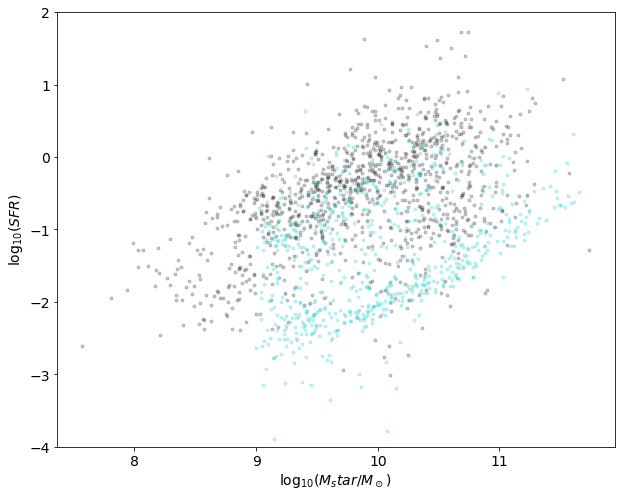

In [96]:
plt.figure(figsize=(10,8))

flag1 = core & g.clusterflag & sf_flag & (mstar > masscut)  #& (mstar < 10.)
flag2 = ~core & sf_flag & (mstar > masscut) #& (mstar < 10.)
plt.plot(mgs['logmass'][fieldsample],mgs['logsfr'][fieldsample],'k.',alpha=.2)
plt.plot(mstar[flag2],sfr[flag2],'c.',alpha=.2)
plt.xlabel('$\log_{10}(M_\star/M_\odot) $')
plt.ylabel('$\log_{10}(SFR) $')
plt.ylim(-4,2)
plt.savefig('sfms_with_mgs.pdf')


############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 0.18009 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 0.00000 (prob that samples are from same distribution)


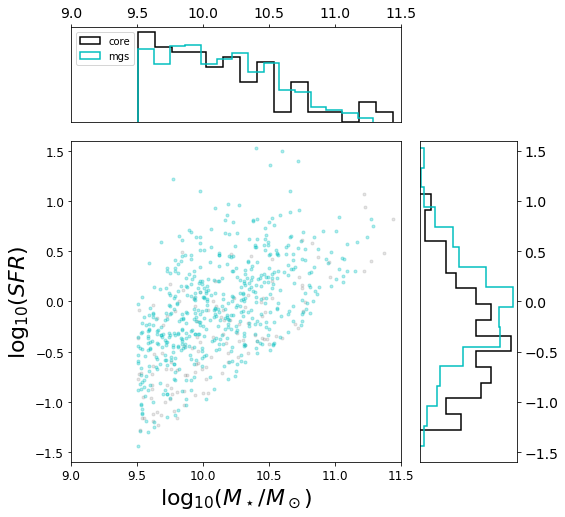

In [136]:
masscut = 9.5
#core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
core = g.membflag
#core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
flag1 = core &  (mstar > masscut)  & (ssfr > -11.)
flag2 = fieldsample & (mgs['logmass'] > masscut) & (mgs['logsfr']-mgs['logmass'] > -11.)
colormass(mstar[flag1],sfr[flag1],mgs['logmass'][flag2],mgs['logsfr'][flag2],'core','mgs','sfr-mstar-cluster-mgs.pdf',ymin=-1.6,ymax=1.6,xmin=9,xmax=11.5,nhistbin=15,ylabel='$\log_{10}(SFR)$')
#plt.plot(xl,xl+ssfr_lower_limit,'k--',c='0.5'6
#plt.axis([9,12,-2,1.5]),

# Still to do #
- bootstrap our external sample, selecting galaxies that have some distribution in SFR-Mass plane as the z0MGS sample.
- this will let us include size in the SF MS plot, using bootstrapped external sample
- incorporate SF in the disk shrinking model.  apply to SF-stellar mass plane. where do objects go in main sequence.  do we reproduce low SF tail seen in core sample.
- what if we split LCS into low and high mass clusters

# Results #

- pop of galaxies with low sSFRs in clusters
- we show that SF is suppressed in infall regions because the external sample is similar in SF-M* to core sample.
- drop in SFRs can be explained by disk shrinking?




############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.15
p-vale = 0.08799 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.14
p-vale = 0.13513 (prob that samples are from same distribution)


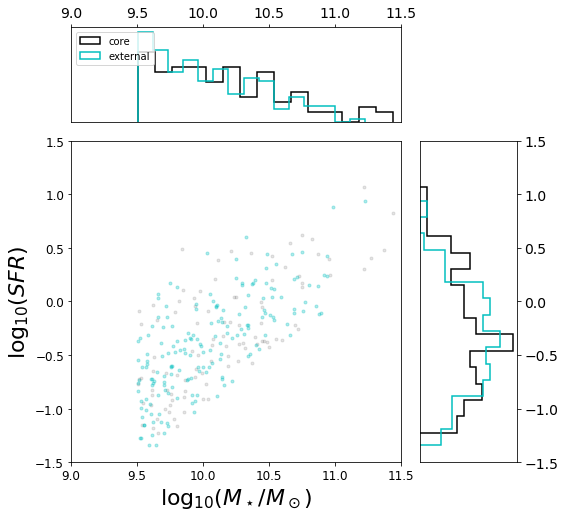

In [128]:
masscut = 9.5
ssfr_cut = -11
core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
flag1 = core  & (mstar > masscut)  & (ssfr > ssfr_cut)
flag2 = ~core & sf_flag & (mstar > masscut) & (ssfr > ssfr_cut)
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-1.5,ymax=1.5,xmin=9,xmax=11.5,nhistbin=15,ylabel='$\log_{10}(SFR)$')
#plt.plot(xl,xl+ssfr_lower_limit,'k--',c='0.5')

In [61]:
g.s.CLUSTER == b'Coma'

array([False, False, False, ...,  True,  True,  True])

(array([  4.,   5.,  59., 141.,  99.,  72.,  53.,  51.,  59.,  80.,  84.,
         47.,  26.,  11.,   7.,   4.,   1.,   1.,   0.]),
 array([-13.        , -12.73684211, -12.47368421, -12.21052632,
        -11.94736842, -11.68421053, -11.42105263, -11.15789474,
        -10.89473684, -10.63157895, -10.36842105, -10.10526316,
         -9.84210526,  -9.57894737,  -9.31578947,  -9.05263158,
         -8.78947368,  -8.52631579,  -8.26315789,  -8.        ]),
 <a list of 1 Patch objects>)

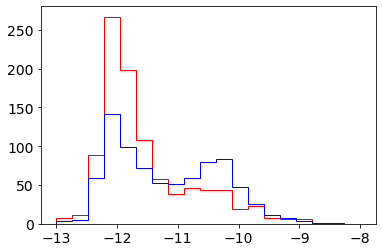

In [103]:
plt.figure()
mybins = np.linspace(-13,-8,20)
plt.hist(ssfr[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(ssfr[~core],bins=mybins,color='b',histtype='step',label='external')


############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 0.00081 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.18
p-vale = 0.00000 (prob that samples are from same distribution)


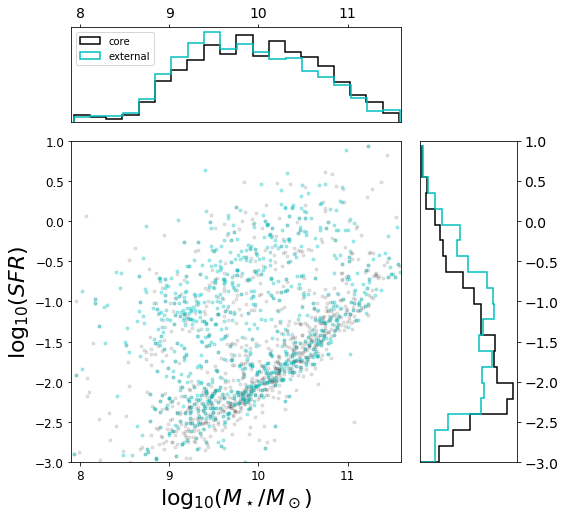

In [22]:
flag1 = g.membflag & sf_flag 
flag2 = ~core & sf_flag 
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-3,ymax=1,nhistbin=20,ylabel='$\log_{10}(SFR)$')

## Ratio of two different SFR measures, comparing field and cluster

seems like we get many more passive field galaxies when using UV+IR sfr

In [105]:
sfr_ir = np.log10(g.s['SFR_ZDIST'])
sfr_uvir =  g.logSFR_NUV_ZDIST
sfr_ratio = sfr_ir - sfr_uvir



/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


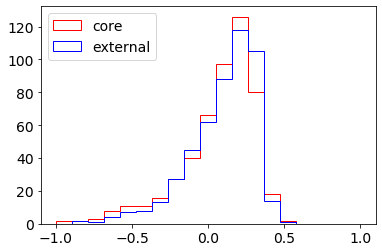

In [109]:
plt.figure()
mybins = np.linspace(-1,1,20)
plt.hist(sfr_ratio[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(sfr_ratio[~core],bins=mybins,color='b',histtype='step',label='external')
plt.legend(loc='upper left')

In [97]:
nuv24 = g.s.ABSMAG[:,1] - g.s.fcmag1

(array([  0.,   0.,   2.,  18.,  47., 103., 121.,  57.,  25.,   2.,   2.,
          1.,   2.,   2.,   1.,   0.,   1.,   1.,   0.]),
 array([-20.        , -18.94736842, -17.89473684, -16.84210526,
        -15.78947368, -14.73684211, -13.68421053, -12.63157895,
        -11.57894737, -10.52631579,  -9.47368421,  -8.42105263,
         -7.36842105,  -6.31578947,  -5.26315789,  -4.21052632,
         -3.15789474,  -2.10526316,  -1.05263158,   0.        ]),
 <a list of 1 Patch objects>)

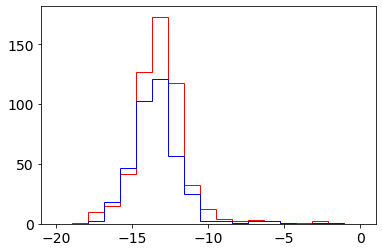

In [100]:
plt.figure()
mybins = np.linspace(-20,0,20)
plt.hist(nuv24[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(nuv24[~core],bins=mybins,color='b',histtype='step',label='external')


(array([  2.,   0.,   1.,   5.,  51., 803.,   8., 567., 352.,  11.]),
 array([-66.16591454, -59.51406432, -52.8622141 , -46.21036388,
        -39.55851367, -32.90666345, -26.25481323, -19.60296301,
        -12.95111279,  -6.29926258,   0.35258764]),
 <a list of 10 Patch objects>)

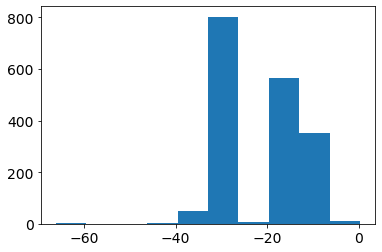

In [99]:
plt.figure()
plt.hist(nuv24)

(0, 7)

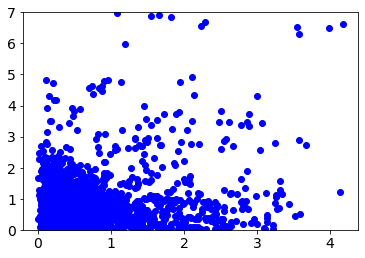

In [113]:
plt.figure()
plt.plot(g.s['DR_R200'],g.s['DELTA_V'],'bo')
plt.ylim(0,7)

In [23]:
sfr = g.SFR_NUV_BEST
sfr = g.SFR_BEST
sfr = g.logSFR_NUV_BEST
#sfr = np.log10(g.s['SFR_ZDIST'])
mstar = g.logstellarmass
ssfr = sfr - mstar
sf_flag = ssfr > -11.8

[ 8.069622  9.062393  9.729434 10.248668 10.885409 11.372235] [ 0.08951795 -1.0090549  -0.5784401  -0.42475212 -0.25589257  0.35476857]
[ 7.9588914  8.949782   9.357066   9.858171  10.342478  11.0165415] [-0.9262373  -1.0165286  -0.9824431  -0.6500736  -0.43450513 -0.22929856]
[ 7.2959633  8.451033   9.239992   9.795658  10.494736  11.000428 ] [-1.4427719  -0.8278848  -0.90380096 -0.5443306  -0.12281922 -0.10765491]


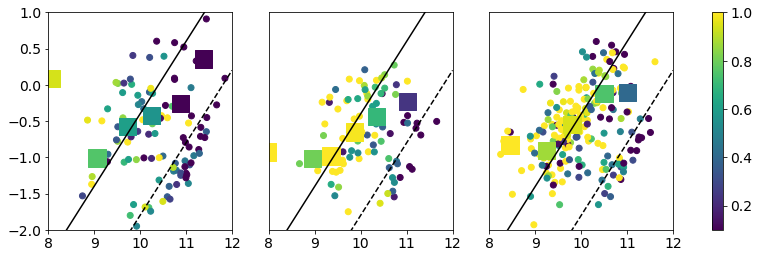

In [24]:
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)

flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
plt.figure(figsize=(14,4))
all_axes=[]
for i in range(len(flags)):
    plt.subplot(1,3,i+1)
    plt.scatter(mstar[flags[i]],sfr[flags[i]],c=g.sizeratio[flags[i]],vmin=.1,vmax=1)
    if i > 0:
        plt.yticks([])
    plt.axis([8,12,-2,1])
    all_axes.append(plt.gca())
    xl = np.linspace(8,12,100)
    yl = -11.8 + xl
    plt.plot(xl,yl,'k--')
    yl = -10.4 + xl
    plt.plot(xl,yl,'k-')
    xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],g.sizeratio[flags[i] & sf_flag],6,use_median=True)
    
    print(xbin,ybin)
    plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=.1,vmax=1,marker='s')
plt.colorbar(ax=all_axes)

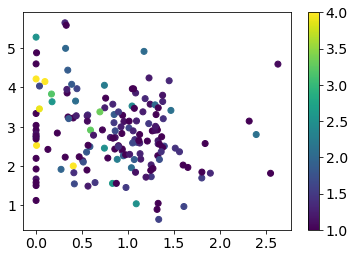

In [153]:
# size vs color for SF field pop

plt.figure()
flag = ~g.membflag & g.galfitflag & sf_flag

plt.scatter(g.sizeratio[flag],g.NUVr[flag],c=g.s['SERSIC_N'][flag],vmin=1,vmax=4)
plt.colorbar()

[ 8.069622  8.945342  9.516651 10.056835 10.519292 11.085979] [ 0.08951795 -1.2655075  -0.5784401  -0.27247596 -0.284118    0.4257636 ]
[ 7.9588914  8.809036   9.318189   9.757981  10.265377  10.72887  ] [-0.9262373  -1.0489608  -0.9824431  -0.72975135 -0.13846084  0.00188851]
[ 7.2959633  8.399897   8.913061   9.466389  10.02633   10.55502  ] [-1.4427719  -0.77720845 -0.91076326 -0.75322783 -0.34723625  0.11348807]


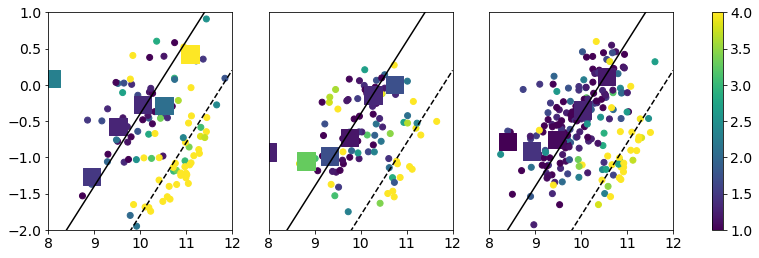

In [155]:
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)

flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
plt.figure(figsize=(14,4))
all_axes=[]
for i in range(len(flags)):
    plt.subplot(1,3,i+1)
    plt.scatter(mstar[flags[i]],sfr[flags[i]],c=g.s['SERSIC_N'][flags[i]],vmin=1,vmax=4)
    if i > 0:
        plt.yticks([])
    plt.axis([8,12,-2,1])
    all_axes.append(plt.gca())
    xl = np.linspace(8,12,100)
    yl = -11.8 + xl
    plt.plot(xl,yl,'k--')
    yl = -10.4 + xl
    plt.plot(xl,yl,'k-')
    xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],g.s['SERSIC_N'][flags[i] & sf_flag],6,use_median=True)
    
    print(xbin,ybin)
    plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=1,vmax=4,marker='s')
plt.colorbar(ax=all_axes)

In [191]:
def sfr_mstar(flags,colorvar,plotbinned=True,v1=.1,v2=1):

    plt.figure(figsize=(14,4))
    all_axes=[]
    for i in range(len(flags)):
        plt.subplot(1,3,i+1)
        plt.scatter(mstar[flags[i]],sfr[flags[i]],c=colorvar[flags[i]],vmin=v1,vmax=v2)
        if i > 0:
            plt.yticks([])
        plt.axis([8,12,-2,1])
        all_axes.append(plt.gca())
        xl = np.linspace(8,12,100)
        # chi by eye split b/w SF and quiescent
        yl = -11.8 + xl
        plt.plot(xl,yl,'k--')
        # chi by eye fit to main sequence in field
        yl = -10.4 + xl
        plt.plot(xl,yl,'k-')
        if plotbinned:
            xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],colorvar[flags[i] & sf_flag],6,use_median=True)
 
            plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=v1,vmax=v2,marker='s')
    plt.colorbar(ax=all_axes)
    
def size_vs_size(flags,colorvar,plotbinned=True,v1=1,v2=10):
    xmin=0
    xmax=15
    plt.figure(figsize=(14,4))
    all_axes=[]
    for i in range(len(flags)):
        plt.subplot(1,3,i+1)
        #plt.scatter(g.s['Rd'][flags[i]],g.s['fre1'][flags[i]],c=colorvar[flags[i]],vmin=v1,vmax=v2)
        plt.scatter(g.s['Rd'][flags[i]],g.s['fre1'][flags[i]],c=colorvar[flags[i]],vmin=v1,vmax=v2)
        if i > 0:
            plt.yticks([])
        plt.axis([xmin,xmax,xmin,xmax])
        #plt.gca().set_xscale('log')
        #plt.gca().set_yscale('log')
        all_axes.append(plt.gca())
        xl = np.linspace(xmin,xmax,100)
        # chi by eye split b/w SF and quiescent
        #yl = -11.8 + xl
        plt.plot(xl,xl,'k--')
        # chi by eye fit to main sequence in field
        #yl = -10.4 + xl
        #plt.plot(xl,yl,'k-')
        if plotbinned:
            xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],colorvar[flags[i] & sf_flag],6,use_median=True)
 
            plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=v1,vmax=v2,marker='s')
    plt.colorbar(ax=all_axes)


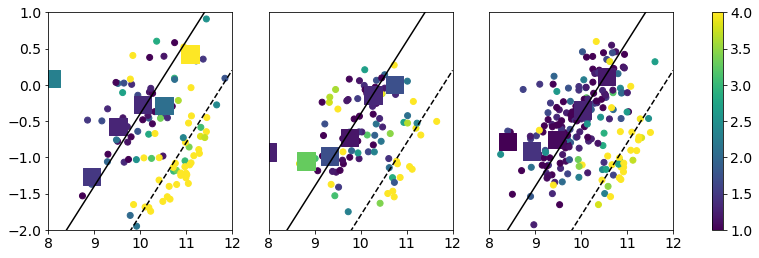

In [176]:
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
sfr_mstar(flags,g.s['SERSIC_N'],v1=1,v2=4)

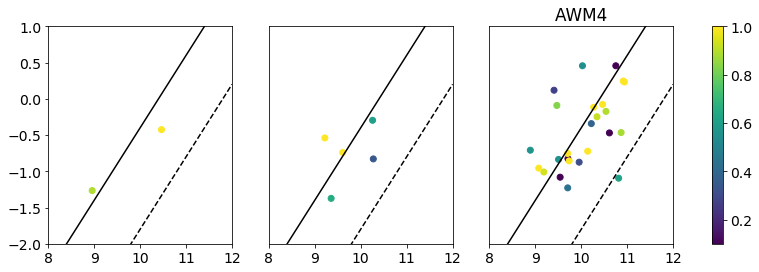

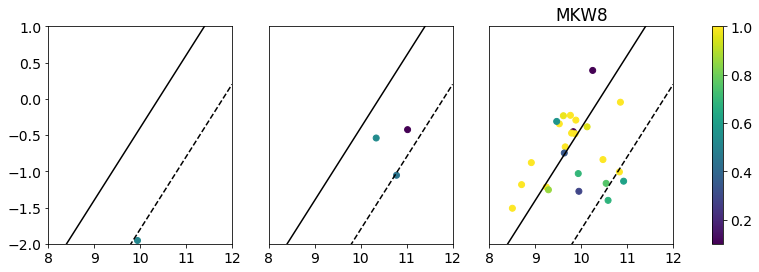

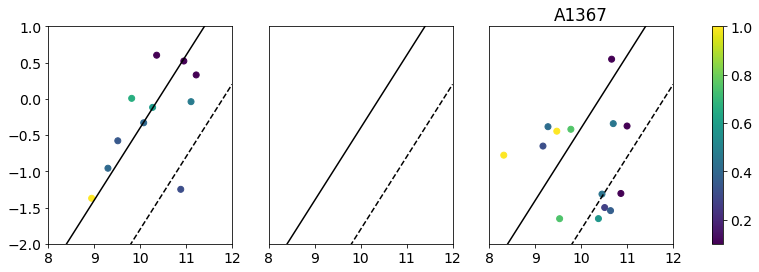

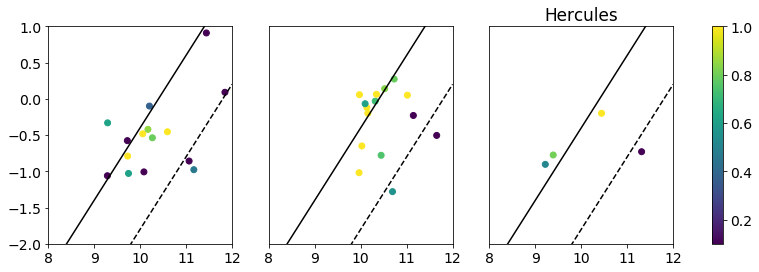

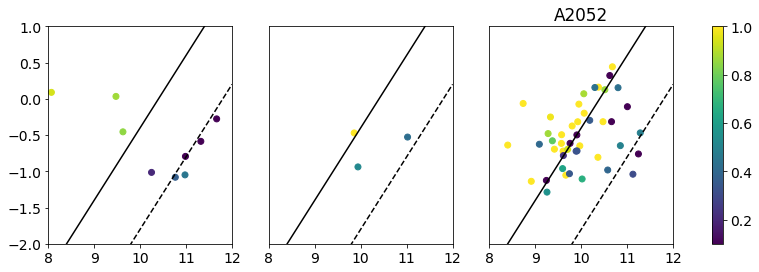

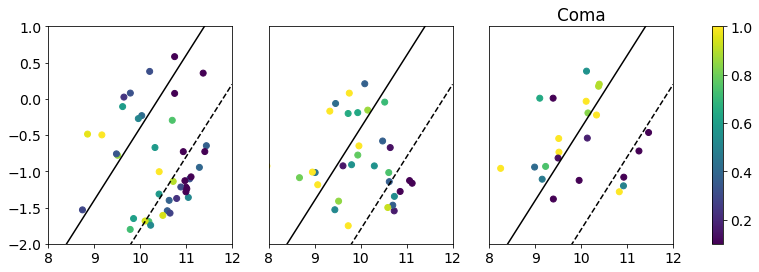

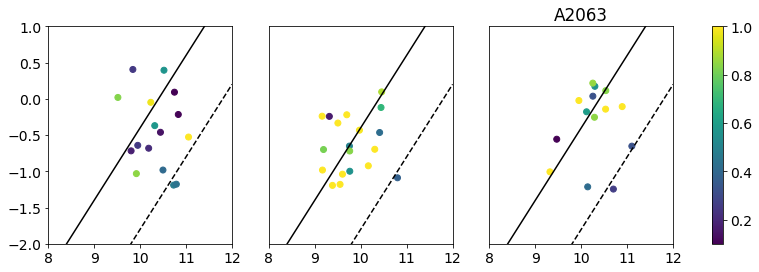

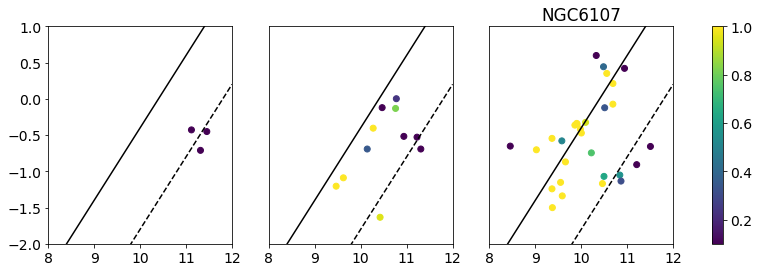

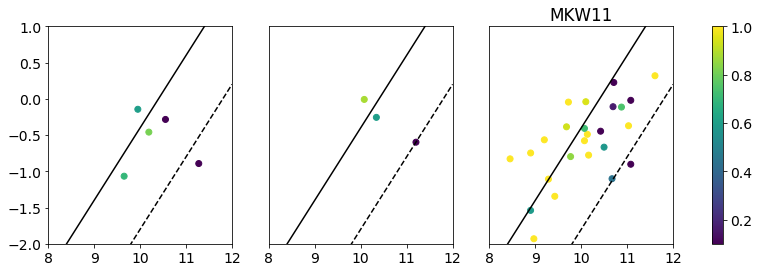

In [169]:
myclusters = set(g.s['CLUSTER'])
for c in myclusters:
    inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
    outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
    flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
    #flags = [inner_cluster , outer_cluster, ~g.membflag ]
    for i in range(len(flags)):
        flags[i] = flags[i] & (g.s['CLUSTER'] == c)
    sfr_mstar(flags,g.sizeratio,plotbinned=False)
    plt.title(c)

Removing galfit flag to see about what we are cutting out with this.

Hercules looses A LOT of points.  This was the cluster where I had PSF problems and ended up using the standard MIPS PRF rather than one from the actual scan. 

Perhaps we should make a measurement using the galfit models without the PRF folded in.

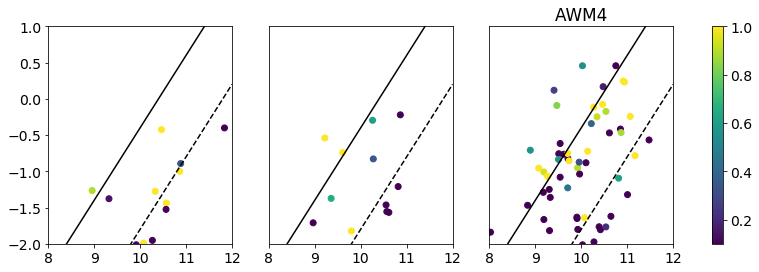

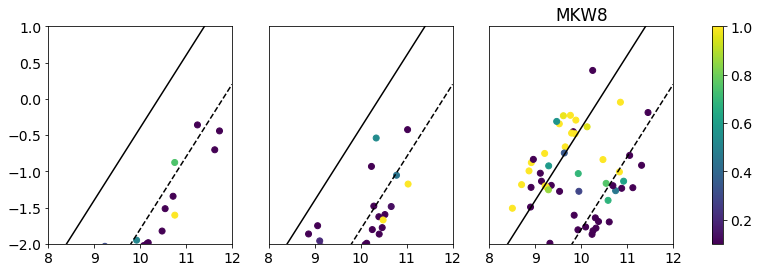

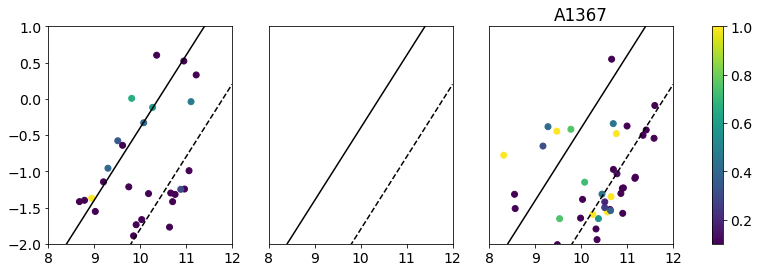

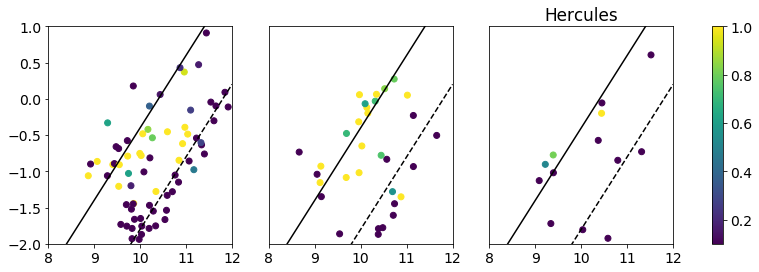

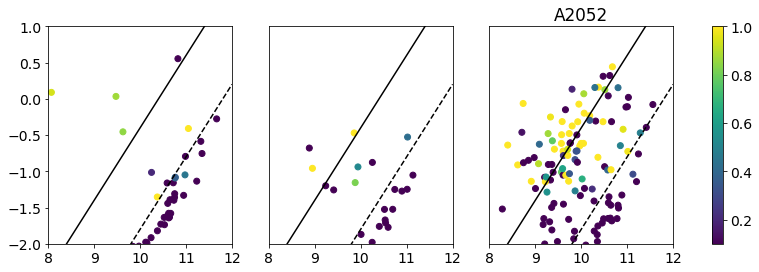

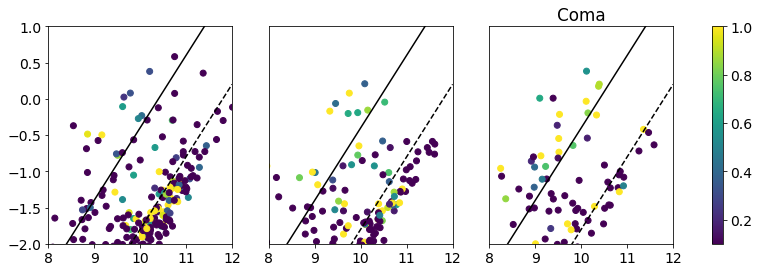

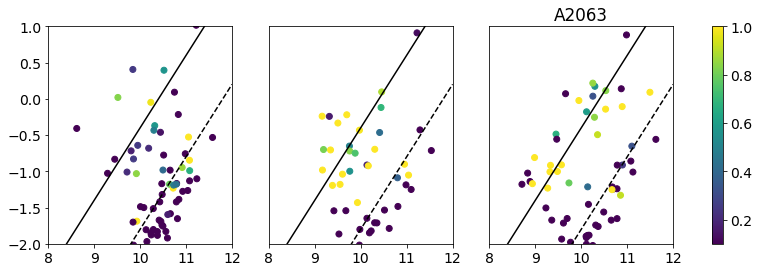

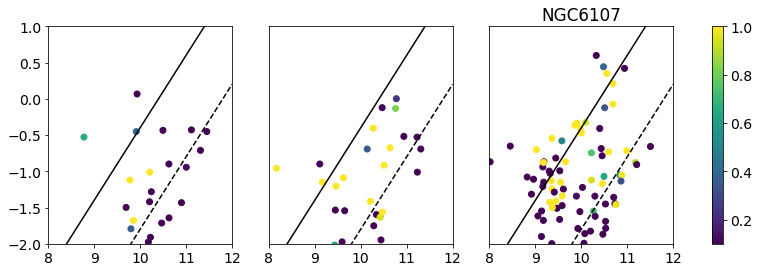

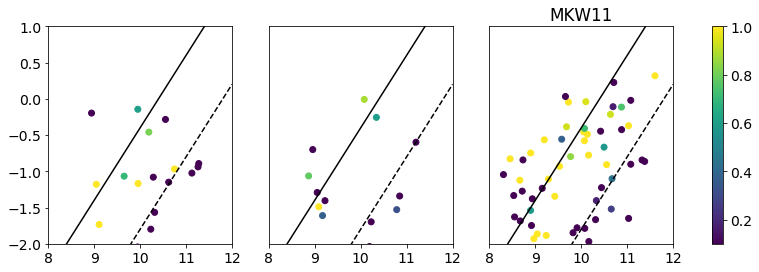

In [168]:
myclusters = set(g.s['CLUSTER'])
for c in myclusters:
    inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
    outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
    flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
    flags = [inner_cluster , outer_cluster, ~g.membflag ]
    for i in range(len(flags)):
        flags[i] = flags[i] & (g.s['CLUSTER'] == c)
    sfr_mstar(flags,g.sizeratio,plotbinned=False)
    plt.title(c)

Comparing 24um sizes with and without convolution.

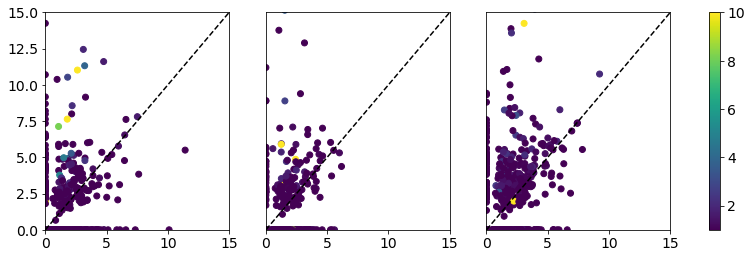

In [190]:
# Disk scale length vs Re24 w/out PRF
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
flags = [inner_cluster , outer_cluster, ~g.membflag]
size_vs_size(flags,g.sizeratio,plotbinned=False)

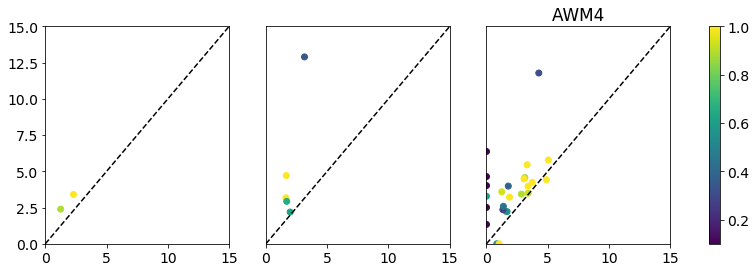

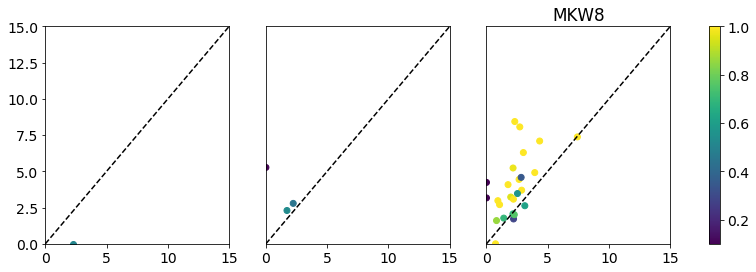

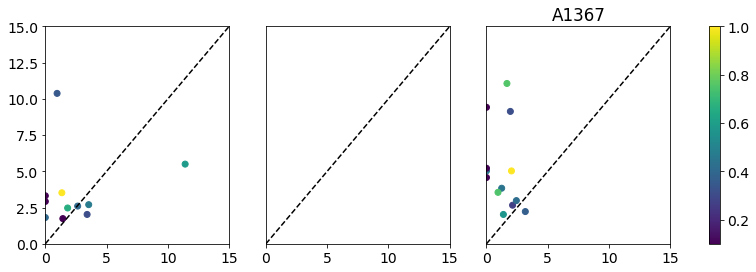

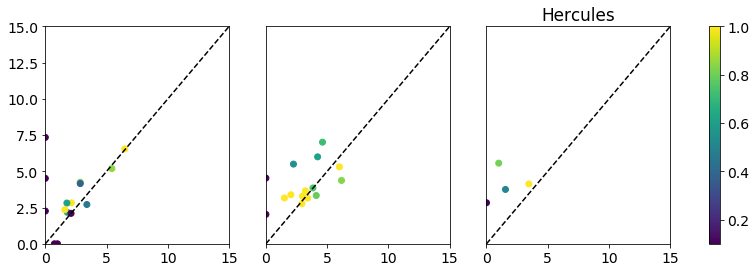

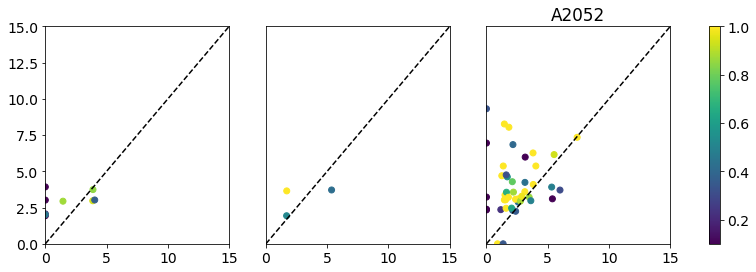

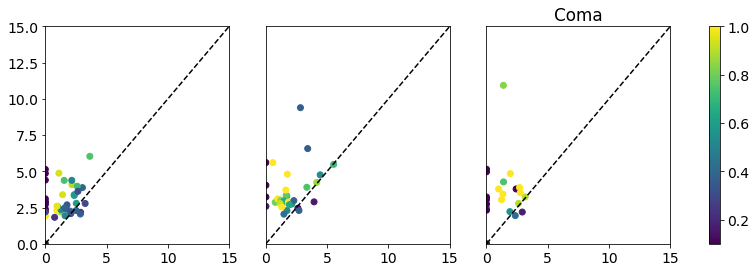

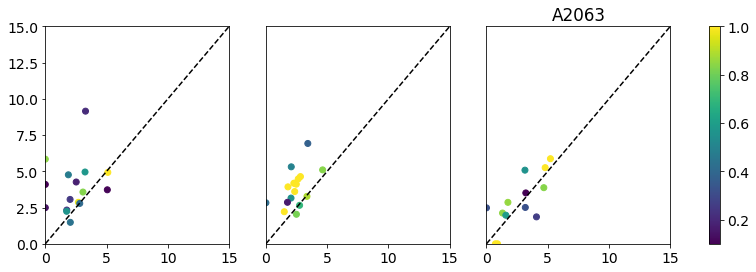

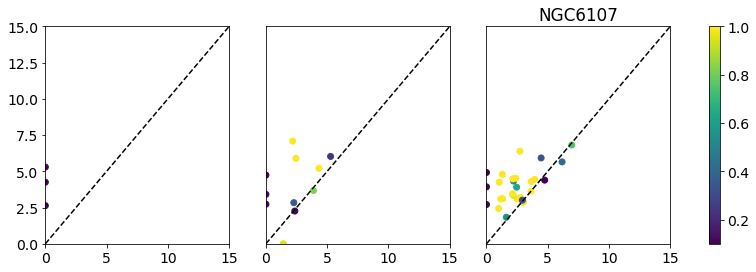

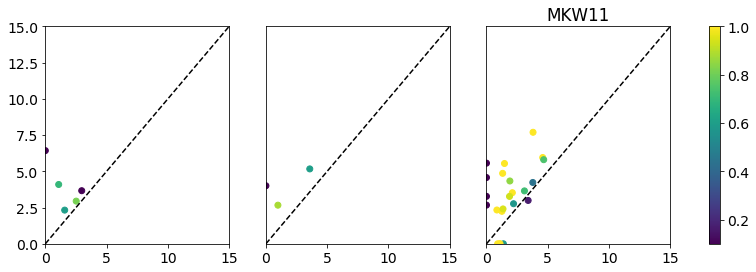

In [192]:
myclusters = set(g.s['CLUSTER'])
for c in myclusters:
    inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
    outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
    flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
    #flags = [inner_cluster , outer_cluster, ~g.membflag ]
    for i in range(len(flags)):
        flags[i] = flags[i] & (g.s['CLUSTER'] == c)
    size_vs_size(flags,g.sizeratio,plotbinned=False,v1=.1,v2=1)
    plt.title(c)